In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

In [4]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 401)
t = np.linspace(0, 15, 201)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t,xi)
X = f1(xx, tt) + f2(xx, tt)

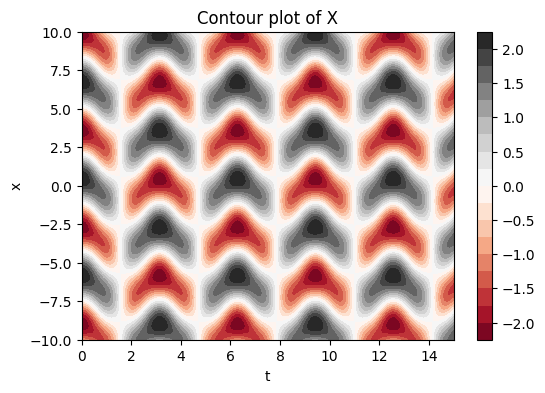

In [5]:
plt.figure(figsize=(6, 4))
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [6]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


In [7]:
print(X_1.shape, X_2.shape)

(401, 200) (401, 200)


In [8]:
U, S, VT = np.linalg.svd(X_1,full_matrices=0)
V=VT.conj().T
S=np.diag(S)
print(U.shape,S.shape, V.shape)


(401, 200) (200, 200) (200, 200)


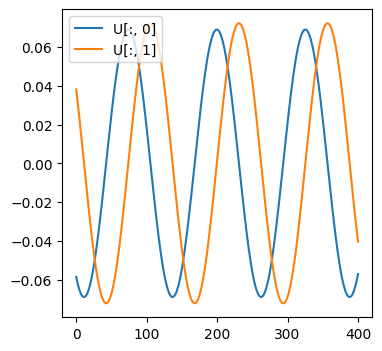

In [9]:
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
plt.legend(loc='upper left')
plt.show()

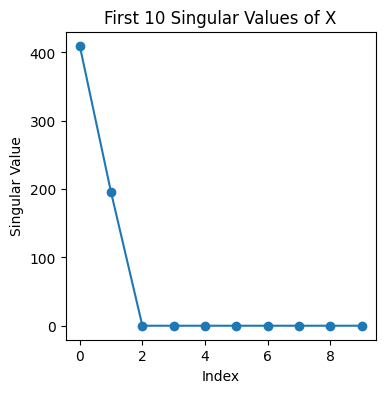

In [10]:
plt.figure(figsize=(4, 4))
plt.plot(np.diag(S[:10]), 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [11]:
print(np.diag(S[:4]))


[4.09821756e+02 1.95298897e+02 1.38795234e-13 1.11717639e-13]


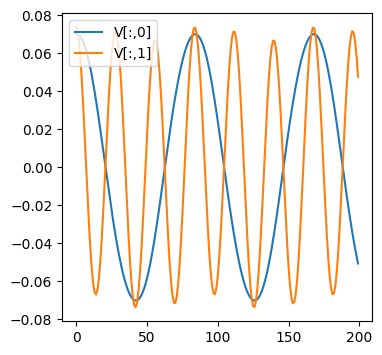

In [12]:
plt.figure(figsize=(4, 4))
plt.plot(V[:,0], label='V[:,0]')
plt.plot(V[:,1], label='V[:,1]')
plt.legend(loc='upper left')
plt.show()

In [13]:
r =2
Ur = U[:,:r]
Sr = S[:r,:r]
Vr = V[:,:r]
print(Ur.shape, Sr.shape, Vr.shape)

(401, 2) (2, 2) (200, 2)


In [14]:
print(X_2.shape)

(401, 200)


In [15]:
print(Ur[:2,:2])

[[-0.05864261+0.00127746j  0.0381626 -0.00254912j]
 [-0.06038855+0.00123511j  0.03504822-0.00246461j]]


In [16]:
A_tilde =  (Ur.conj().T) @ X_2 @ Vr @ np.linalg.inv(Sr)

In [17]:
print(A_tilde)

[[ 0.99717275+0.07503605j  0.00315361-0.00248209j]
 [-0.00227925-0.00330319j  0.97481018+0.22300002j]]


In [18]:
Lambda, W = np.linalg.eig(A_tilde)

In [19]:

print(Lambda)

[0.99718882+0.07492971j 0.97479411+0.22310636j]


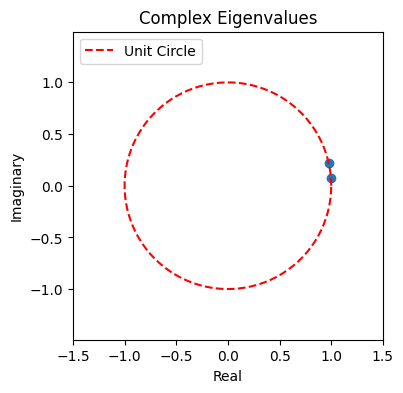

In [20]:
# Plot the eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.scatter(Lambda.real, Lambda.imag)

# Plot unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='r', label='Unit Circle')

plt.axis('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Complex Eigenvalues')
plt.legend(loc='upper left')
plt.show()

In [21]:
print(W)

[[ 0.99964109+0.j         -0.01952857-0.01833895j]
 [ 0.01952857-0.01833895j  0.99964109+0.j        ]]


In [22]:
Phi = X_2 @ Vr @ np.linalg.inv(Sr) @ W

In [23]:
print(Phi[:2,:])

[[-0.05779974-0.00381428j  0.03866066+0.00731204j]
 [-0.05960048-0.00393311j  0.03563217+0.00673925j]]


In [24]:
Omega = np.log(Lambda)/dt

In [25]:
print(Omega.shape, Omega)
print("*******************")
print("Notice the imaginary parts", np.imag(Omega))


(2,) [ 2.00863802e-15+1.j -4.79597096e-15+3.j]
*******************
Notice the imaginary parts [1. 3.]


In [26]:
amp = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]

In [27]:
print(amp.shape[0], amp)

2 [28.90785959-1.90766647j 13.58571655-2.56951776j]


In [28]:
t_exp = np.arange(X.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * amp.reshape(amp.shape[0], -1)
print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)

(201,) (2, 201) (2, 201)
201
201


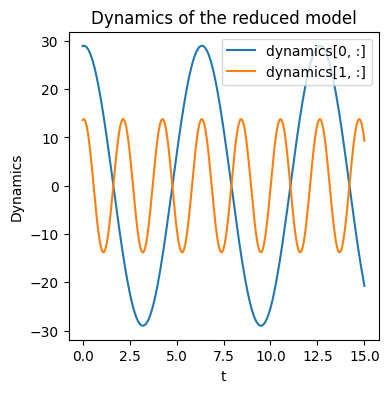

In [29]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='dynamics[0, :]')
plt.plot(t_exp, dynamics[1, :], '-', label='dynamics[1, :]')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [30]:
X_dmd = Phi @ dynamics
print(X_dmd.shape)

(401, 201)


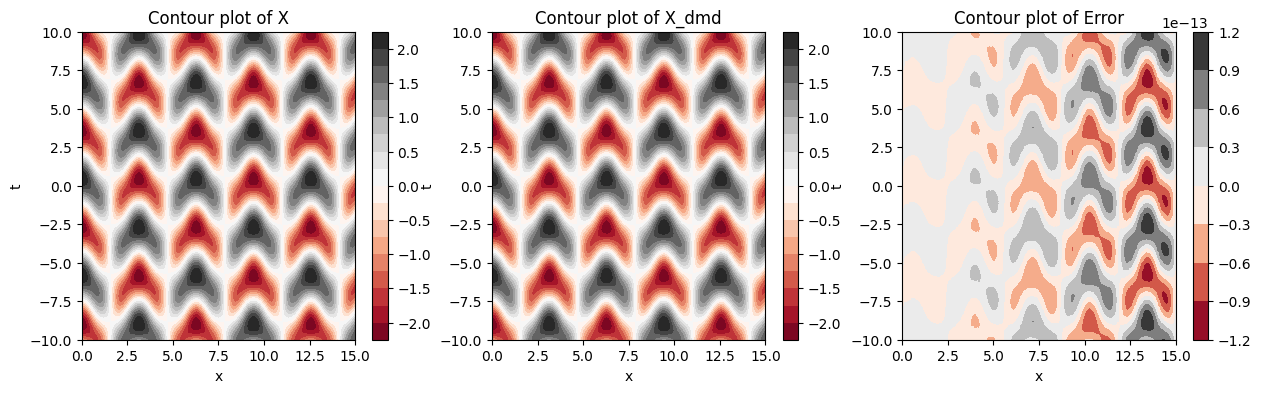

In [31]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 3, 2)
plt.contourf(tt, xx, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

X_diff = np.real(X) - np.real(X_dmd)
plt.subplot(1, 3, 3)
plt.contourf(tt, xx, X_diff , cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of Error')


plt.show()